In [9]:
! pip install ultralytics

In [10]:
import gdown
import os

In [11]:
os.makedirs("data",exist_ok=True)

In [12]:
# upload your gdrive url
url = "https://drive.google.com/file/d/1uVb59BEtNN9Ece0oxYMq_czUIy80p9VK/view?usp=sharing"
file_id = url.split("/")[-2]
prefix = "https://drive.google.com/uc?/export=download&id="
gdown.download(prefix+file_id, "data/foggy_vehicle_data.zip")

Downloading...
From (original): https://drive.google.com/uc?/export=download&id=1uVb59BEtNN9Ece0oxYMq_czUIy80p9VK
From (redirected): https://drive.google.com/uc?%2Fexport=download&id=1uVb59BEtNN9Ece0oxYMq_czUIy80p9VK&confirm=t&uuid=73d28186-7db6-4d03-b7f1-272ca8dc802b
To: /content/data/foggy_vehicle_data.zip
100%|██████████| 57.9M/57.9M [00:00<00:00, 153MB/s]


'data/foggy_vehicle_data.zip'

In [13]:
!unzip data/foggy_vehicle_data.zip -d data
!rm -rf data/foggy_vehicle_data.zip


Archive:  data/foggy_vehicle_data.zip
replace data/README.roboflow.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace data/data.yaml? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace data/test/images/D037_png.rf.24f9ee759d0c4783e8d06dd4c8836ff3.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace data/test/images/D054_png.rf.d985d3405687166447deb06fbe807ebb.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [17]:
%cat data/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 5
names: ['Bus', 'Car', 'MotorCycle', 'Truck', 'Van']

roboflow:
  workspace: js-2wbtl
  project: foggy-cityscapes-dataset-drkvl
  version: 1
  license: CC BY 4.0
  url: https://app.roboflow.com/js-2wbtl/foggy-cityscapes-dataset-drkvl/1

In [18]:
import yaml
with open("data/data.yaml","r") as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

print(num_classes)

5


In [19]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
model.info()

YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs


(129, 3157200, 0, 8.8575488)

In [20]:
results = model.train(data="data/data.yaml",
                      epochs=50,
                      batch=32,
                      imgsz=640,
                      device='cuda')

Ultralytics 8.4.12 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, p

In [21]:
! pip show tensorboard

Name: tensorboard
Version: 2.19.0
Summary: TensorBoard lets you watch Tensors Flow
Home-page: https://github.com/tensorflow/tensorboard
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.12/dist-packages
Requires: absl-py, grpcio, markdown, numpy, packaging, protobuf, setuptools, six, tensorboard-data-server, werkzeug
Required-by: tensorflow


In [23]:
# %load_ext tensorboard
# %tensorboard --logdir runs

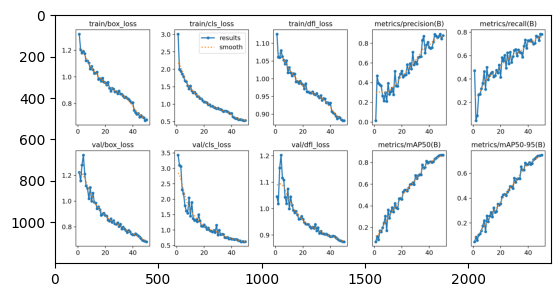

In [24]:
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open("/content/runs/detect/train/results.png")
plt.imshow(img)
plt.show()

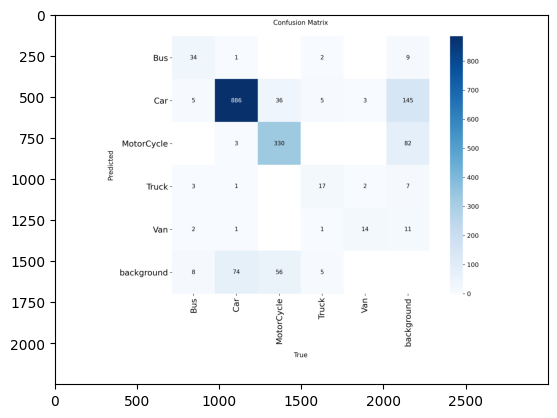

In [25]:
cm =  Image.open("/content/runs/detect/train/confusion_matrix.png")
plt.imshow(cm)
plt.show()

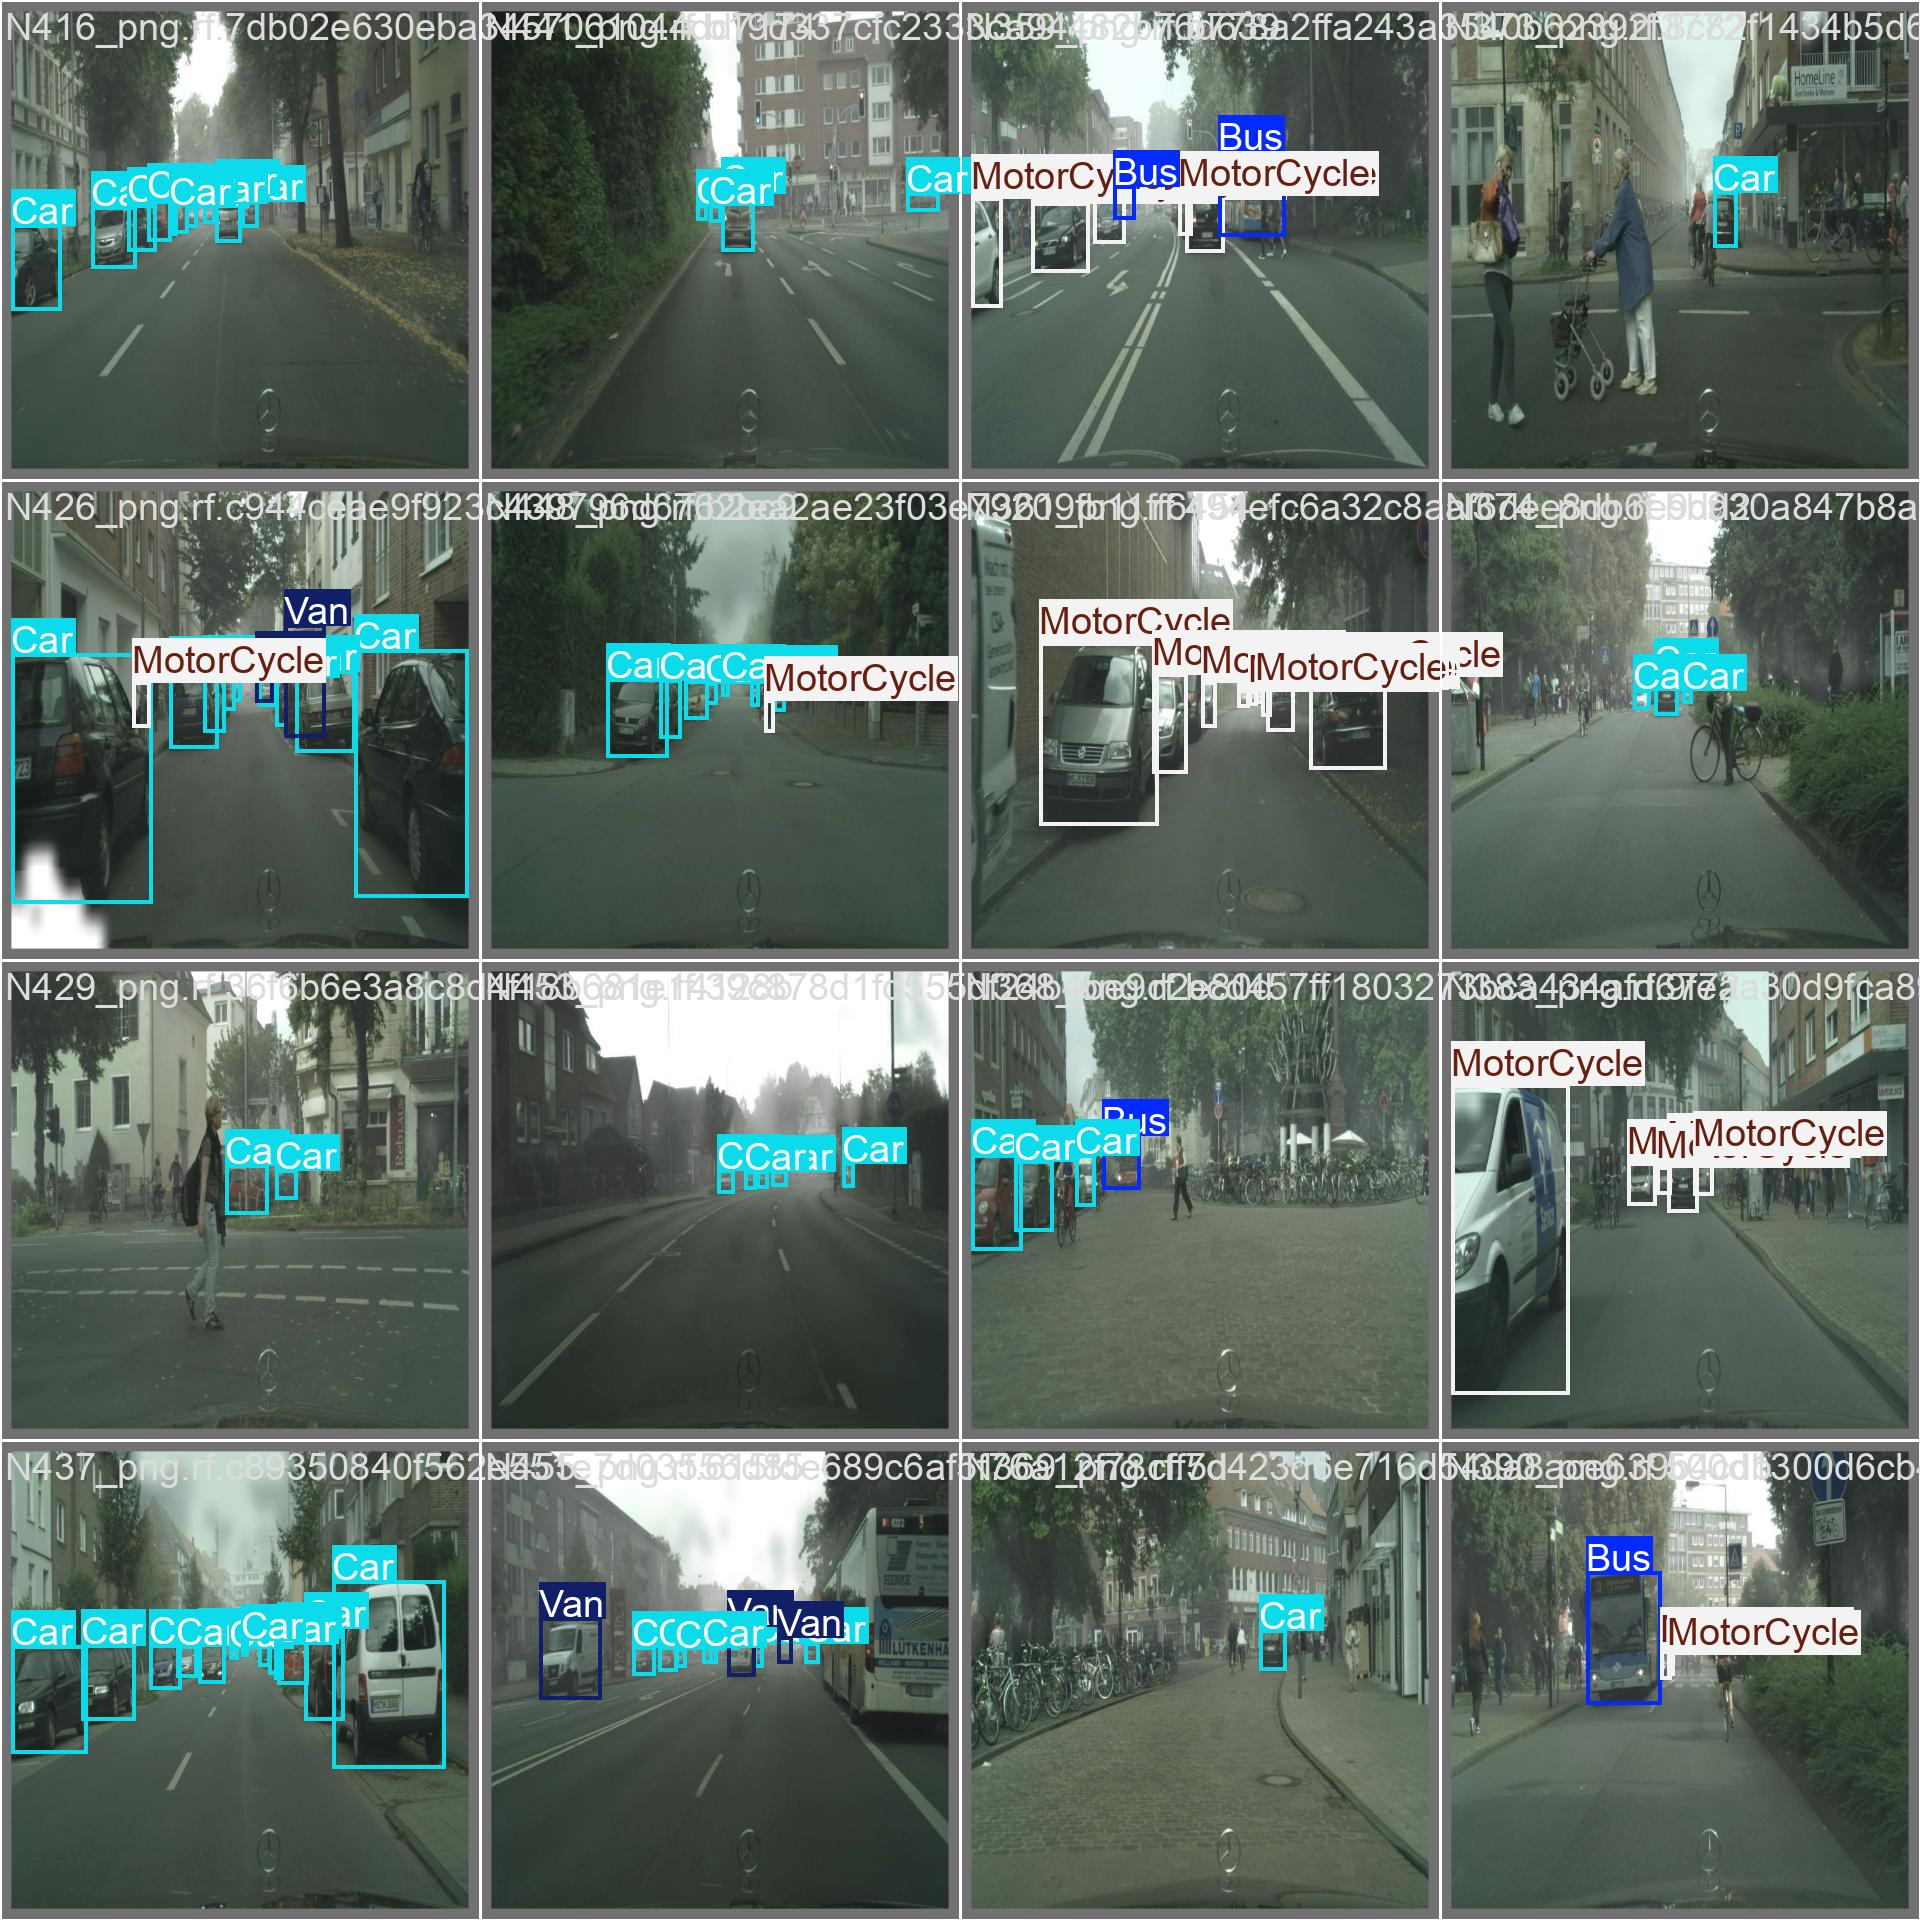

In [27]:
Image.open("/content/runs/detect/train/val_batch0_labels.jpg")

In [28]:
from ultralytics import YOLO

model = YOLO("/content/runs/detect/train/weights/best.pt")

results = model.predict(
    source="/content/data/test/images/D054_png.rf.d985d3405687166447deb06fbe807ebb.jpg",
    conf=0.25,
    imgsz=640
)



image 1/1 /content/data/test/images/D054_png.rf.d985d3405687166447deb06fbe807ebb.jpg: 640x640 4 Cars, 7.6ms
Speed: 2.3ms preprocess, 7.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


In [29]:
! ffmpeg -i /content/35_hazy_video.mp4 -vf scale=960:-2 /content/35_hazy_video_960p.mp4


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [30]:
from ultralytics import YOLO

model = YOLO("/content/runs/detect/train/weights/best.pt")

model.predict(
    source="/content/35_hazy_video_960p.mp4",
    imgsz=640,
    conf=0.3,
    save=True
)



WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/247) /content/35_hazy_video_960p.mp4: 384x640 (no detections), 45.6ms
video 1/1 (frame 2/247) /content/35_hazy_video_960p.mp4: 384x640 (no detections), 7.1ms
video 1/1 (frame 3/247) /content/35_hazy_video_960p.mp4: 384x640 (no detections), 9.9ms
video 1/1 (frame 4/247) /content/35_hazy_video_960p.mp4: 384x640 (no detections), 7.6ms
video 1/1 (frame 5/247) /content/35_hazy_video_960p.mp4: 384x640 (no detections), 7.7ms
video 1/1 (frame 

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Bus', 1: 'Car', 2: 'MotorCycle', 3: 'Truck', 4: 'Van'}
 obb: None
 orig_img: array([[[190, 189, 183],
         [190, 189, 183],
         [190, 189, 183],
         ...,
         [ 74,  79,  77],
         [ 77,  82,  80],
         [ 88,  93,  91]],
 
        [[190, 189, 183],
         [190, 189, 183],
         [190, 189, 183],
         ...,
         [ 83,  88,  86],
         [ 86,  91,  89],
         [ 96, 101,  99]],
 
        [[190, 189, 183],
         [190, 189, 183],
         [190, 189, 183],
         ...,
         [ 86,  91,  89],
         [ 88,  93,  91],
         [ 96, 101,  99]],
 
        ...,
 
        [[ 45,  46,  41],
         [ 45,  46,  41],
         [ 45,  46,  41],
         ...,
         [ 41,  38,  39],
         [ 41,  38,  39],
         [ 41,  38,  39]],
 
        [[ 45,  46,  41],
         [ 45,  46,  41],
         [ 4

In [34]:
! ffmpeg -i runs/detect/predict/35_hazy_video_960p.avi \
       -vcodec libx264 -pix_fmt yuv420p \
       runs/detect/predict/35_hazy_video_960p_fixed.mp4


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [35]:
from IPython.display import Video, display

video_path = "runs/detect/predict/35_hazy_video_960p_fixed.mp4"
display(Video(video_path, embed=True))
